# Lab Task

1. Read the data SeaIce.txt.

2. Select the numeric features (feature selection). 

3. Find the Basic Statistics (Mean, Variance, S.D)

4. Find the outliers (if any)?

5. How to find outliers( Five number summary IQR)

6. How to resolve outlier problems? Either can be replaced with mean or you can remove instance?

7. After pre-processing, plot histogram to see the data behavior(is it normal or skewed data?)

8. Perform Linear Regression.

9. Plot the actual dependent variable and predicted dependent variable.

10. Estimate the extent value for the year 2025

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [20]:
#1 Load the data and show the info and contents:
import pandas as pd
ice = pd.read_csv('SeaIce.txt', delim_whitespace = True)
print('Shape:', ice.shape)
ice.head() 

Shape: (424, 6)


,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.54,12.33
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92


In [21]:
#2 Select the numeric features (feature selection).

numeric_features = ice.select_dtypes(include=[np.number])
numeric_features.head()


,year,mo,extent,area
0,1979,1,15.54,12.33
1,1980,1,14.96,11.85
2,1981,1,15.03,11.82
3,1982,1,15.26,12.11
4,1983,1,15.10,11.92


In [22]:
#3 Find the Basic Statistics (Mean, Variance, S.D)

# Calculate mean
mean = numeric_features.mean()

# Calculate variance
variance = numeric_features.var()

# Calculate standard deviation
std_dev = numeric_features.std()

print("Mean:\n", mean)
print("\nVariance:\n", variance)
print("\nStandard Deviation:\n", std_dev)


Mean:
 year      1996.000000
mo           6.500000
extent     -35.443066
area       -37.921108
dtype: float64

Variance:
 year         104.340426
mo            12.070922
extent    471607.576551
area      471373.394921
dtype: float64

Standard Deviation:
 year       10.214716
mo          3.474323
extent    686.736905
area      686.566381
dtype: float64


In [23]:
# Calculate IQR for each numeric feature
Q1 = numeric_features.quantile(0.25)
Q3 = numeric_features.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
outliers = (numeric_features < (Q1 - 1.5 * IQR)) | (numeric_features > (Q3 + 1.5 * IQR))

# Print outliers
print(outliers)


      year     mo  extent   area
0    False  False   False  False
1    False  False   False  False
2    False  False   False  False
3    False  False   False  False
4    False  False   False  False
..     ...    ...     ...    ...
419  False  False   False  False
420  False  False   False  False
421  False  False   False  False
422  False  False   False  False
423  False  False   False  False

[424 rows x 4 columns]


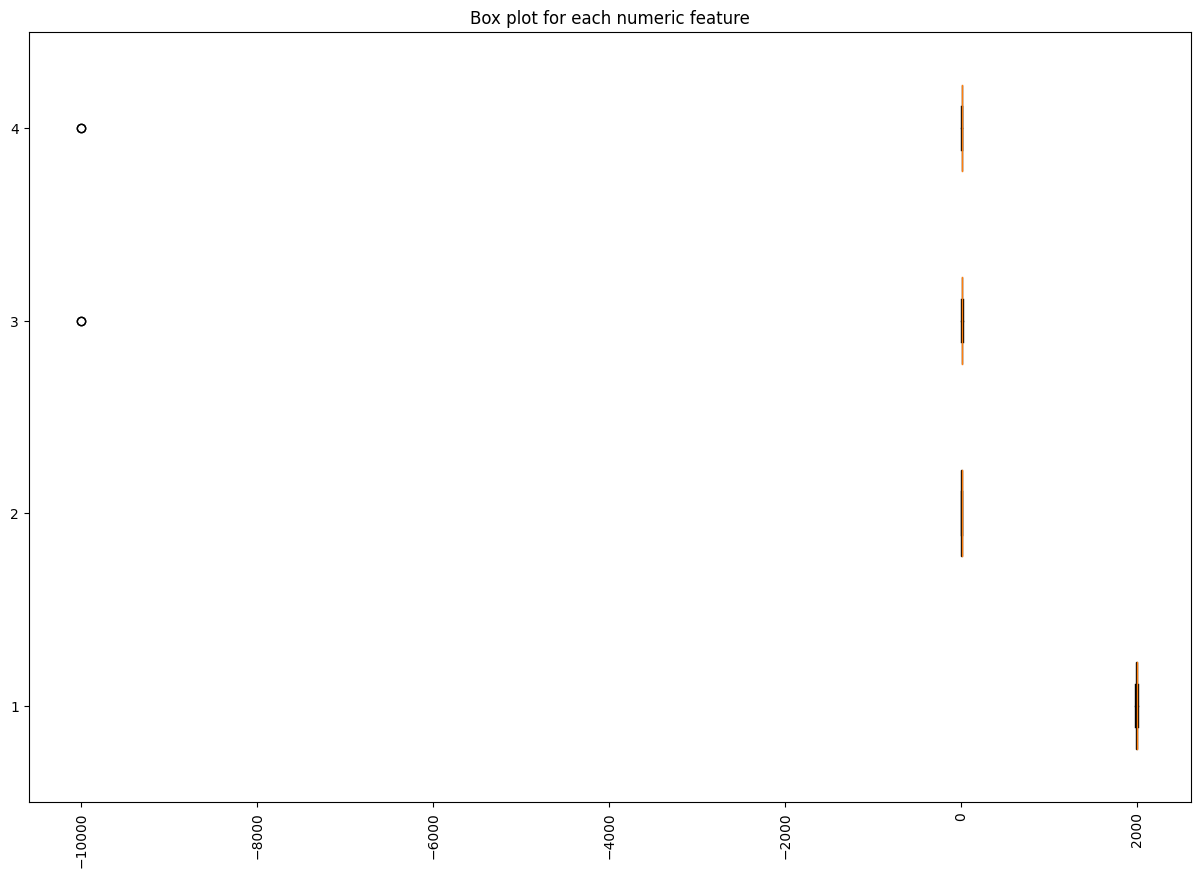

In [24]:
plt.figure(figsize=(15,10))
plt.xticks(rotation='vertical')
plt.boxplot(numeric_features, vert=False, patch_artist=True)
plt.title('Box plot for each numeric feature')
plt.show()

In [25]:
# Calculate Q1, Q3, and IQR
Q1 = numeric_features.quantile(0.25)
Q3 = numeric_features.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
outliers = (numeric_features < (Q1 - 1.5 * IQR)) | (numeric_features > (Q3 + 1.5 * IQR))

# Print outliers
print(outliers)


      year     mo  extent   area
0    False  False   False  False
1    False  False   False  False
2    False  False   False  False
3    False  False   False  False
4    False  False   False  False
..     ...    ...     ...    ...
419  False  False   False  False
420  False  False   False  False
421  False  False   False  False
422  False  False   False  False
423  False  False   False  False

[424 rows x 4 columns]


In [34]:
# Remove outliers
numeric_features = numeric_features[~outliers.any(axis=1)]

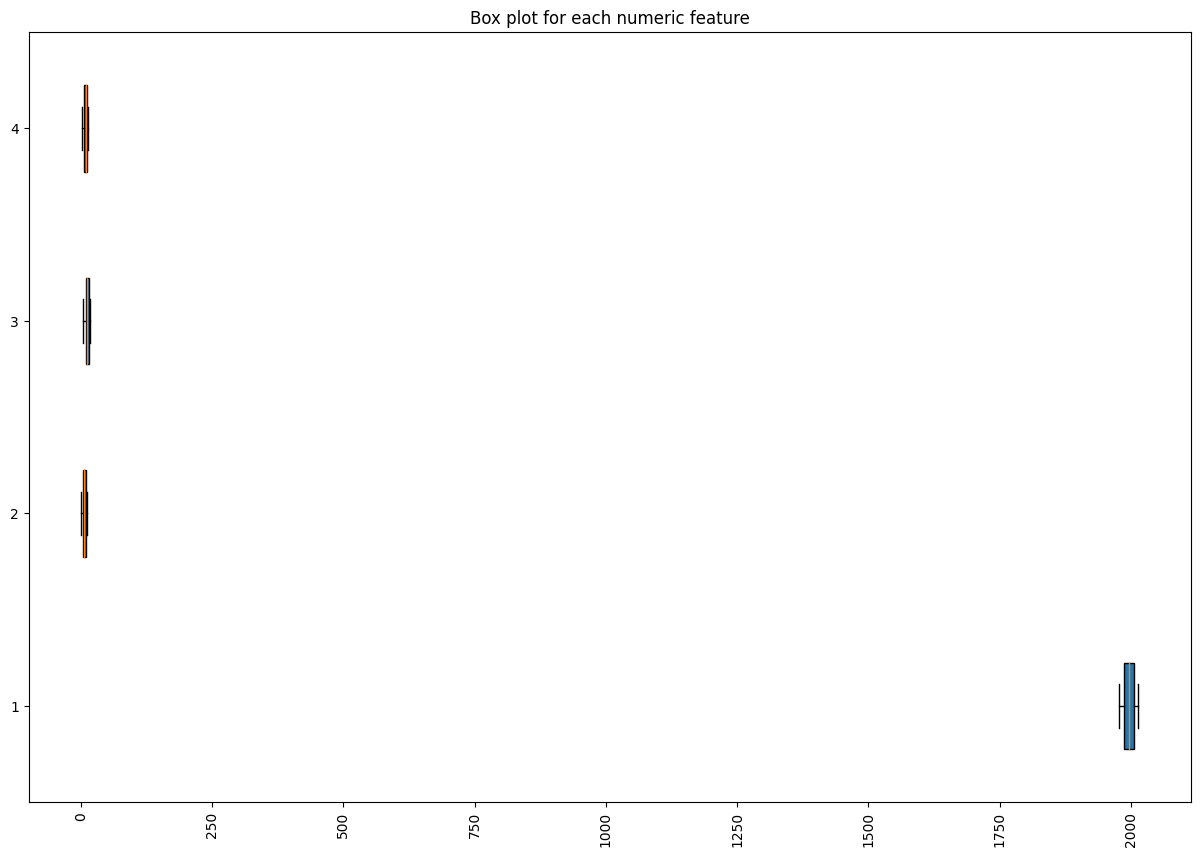

In [42]:
plt.figure(figsize=(15,10))
plt.xticks(rotation='vertical')
plt.boxplot(numeric_features, vert=False, patch_artist=True)
plt.title('Box plot for each numeric feature')
plt.show()

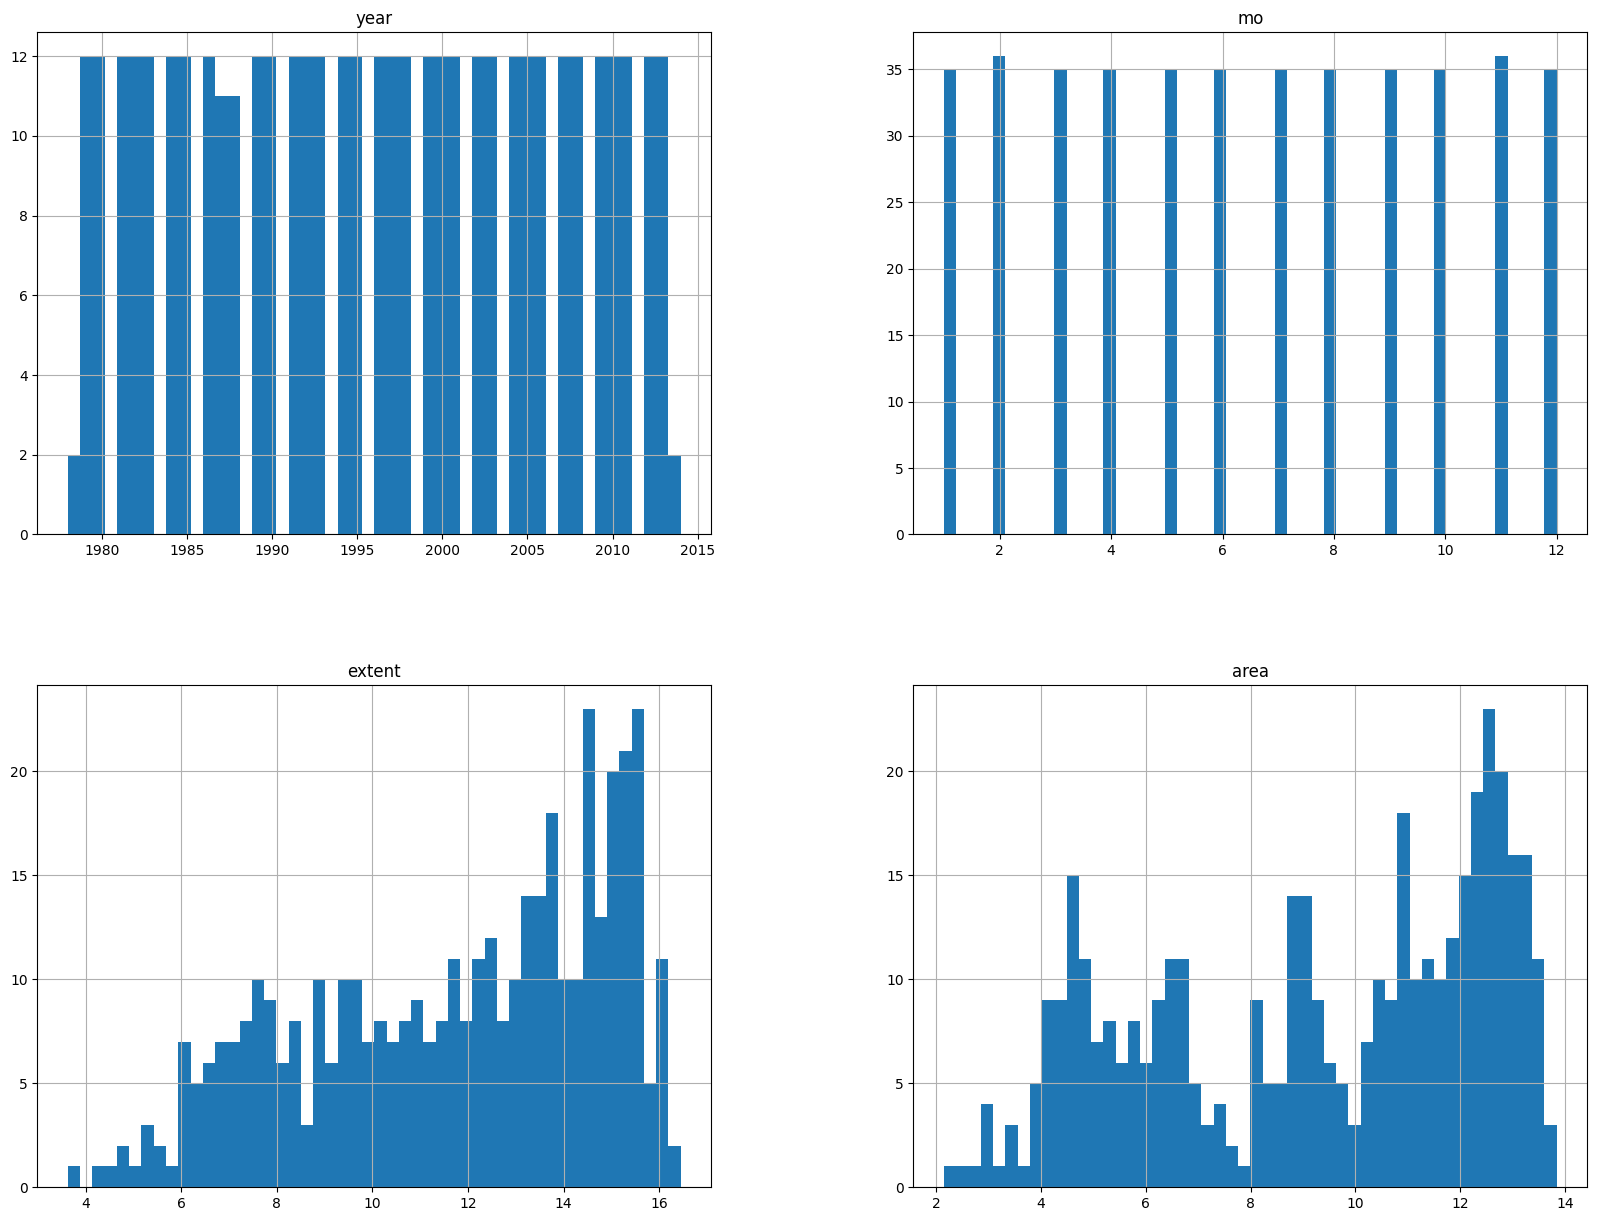

In [35]:
numeric_features.hist(bins=50, figsize=(20,15))
plt.show()

In [36]:
# Function to calculate m and b
def linear_regression(X, y):
    x_mean = np.mean(X)
    y_mean = np.mean(y)
    numerator = np.sum((X - x_mean) * (y - y_mean))
    denominator = np.sum((X - x_mean) ** 2)
    b = numerator / denominator
    a = y_mean - (b * x_mean)
    return a, b

In [37]:
#8 Perform Linear Regression.

# Define the independent variable (X) and the dependent variable (Y)
X = numeric_features['year'].values
Y = numeric_features['extent'].values

# Perform linear regression
a, b = linear_regression(X, Y)

# Print the slope and intercept
print("Slope (b):", b)
print("Intercept (a):", a)


Slope (b): -0.0501862489874845
Intercept (a): 111.95135763833846


In [38]:
# Function to calculate prediction
def predict(X, a, b):
    return b * X + a
# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

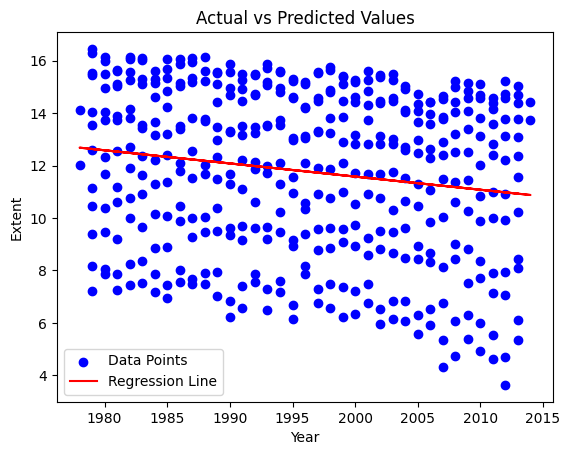

In [39]:
#9 Plot the actual dependent variable and predicted dependent variable.

# Making predictions
predictions = predict(X, a, b)

# Plotting the actual and predicted values
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, predictions, color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Extent')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


In [40]:
predictions = predict(X, a, b)
error = rmse(Y, predictions)
print("Predictions:", predictions)
print("RMSE:", error)

Predictions: [12.63277089 12.58258464 12.53239839 12.48221215 12.4320259  12.38183965
 12.3316534  12.28146715 12.2312809  12.1309084  12.08072215 12.0305359
 11.98034966 11.93016341 11.87997716 11.82979091 11.77960466 11.72941841
 11.67923216 11.62904591 11.57885966 11.52867341 11.47848717 11.42830092
 11.37811467 11.32792842 11.27774217 11.22755592 11.17736967 11.12718342
 11.07699717 11.02681092 10.97662468 10.92643843 10.87625218 12.63277089
 12.58258464 12.53239839 12.48221215 12.4320259  12.38183965 12.3316534
 12.28146715 12.2312809  12.18109465 12.1309084  12.08072215 12.0305359
 11.98034966 11.93016341 11.87997716 11.82979091 11.77960466 11.72941841
 11.67923216 11.62904591 11.57885966 11.52867341 11.47848717 11.42830092
 11.37811467 11.32792842 11.27774217 11.22755592 11.17736967 11.12718342
 11.07699717 11.02681092 10.97662468 10.92643843 10.87625218 12.63277089
 12.58258464 12.53239839 12.48221215 12.4320259  12.38183965 12.3316534
 12.28146715 12.2312809  12.18109465 12.13

In [41]:
#10 Estimate the extent value for the year 2025

year_2025 = np.array([2025])
predicted_extent_2025 = predict(year_2025, a, b)
print("Predicted extent for the year 2025:", predicted_extent_2025[0])

Predicted extent for the year 2025: 10.324203438682346
